In [23]:
import sys
import pandas as pd
import sklearn
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt 

In [24]:

#import matplotlib.pyplot as plt
path = '/home/shared/kunchaya/data/must-c-v1/en-de/result/'
dataset = 'tst-COMMON'

In [25]:
#bleu, chrf, ter score
bleu_metric = pd.read_csv(path + dataset+ '/bleu.txt', names = ["score"])
chrf_metric = pd.read_csv(path + dataset+ '/chrf.txt', sep = "=" , names = ["setup","score"])
ter_metric = pd.read_csv(path + dataset+ '/ter.txt',sep = "=" , names = ["setup","score"])

#extract coment score
comet_metric = pd.read_csv(path + dataset+ '/comet.txt', sep = ' ', header = None, names=["filename", "line", "score"])
comet_metric.drop(comet_metric.tail(1).index,inplace=True) #drop last 1 row

#geting decoder confidence score
decoder_confi = pd.read_csv(path + dataset+'/decoder_confi.txt', header = None)

In [26]:

#calculating pearson colloreation of bleu, chrf, ter and comet
#bleu, chrf, ter
bleu_p = r_regression(decoder_confi, bleu_metric.values.ravel())
chrf_p = r_regression(decoder_confi, chrf_metric.iloc[:,-1:].values.ravel())
ter_p = r_regression(decoder_confi, ter_metric.iloc[:,-1:].values.ravel())

#comet
comet_p = r_regression(decoder_confi, comet_metric.iloc[:,-1:].values.ravel()) 

In [27]:
# make it absolute value and into percent

Note that we care about the magnitude (absolute value) of the correlation and not whether it is positive or negative. For example, TER is expected to correlate negatively with human ranking because higher TER means more errors while higher metric score mean higher translation quality. (zouhar et al. 2022)

In [28]:
pearson = [bleu_p*100, chrf_p*100, ter_p*100, comet_p*100] #make it into percent
index = ['BLEU', 'Chrf', 'Ter',
         'COMET' ]
df = pd.DataFrame({'Pearson Correlation (%)':pearson}, index = index)
df['Pearson Correlation (%)'] = df['Pearson Correlation (%)'].astype(float).abs() #changes data type to float and absolute value

In [29]:
print(df)

       Pearson Correlation (%)
BLEU                 48.085786
Chrf                 55.646506
Ter                  45.560206
COMET                62.968344


Automatic metrics have n(%) correlation with decoder confidence *** It should be another way around !!!!

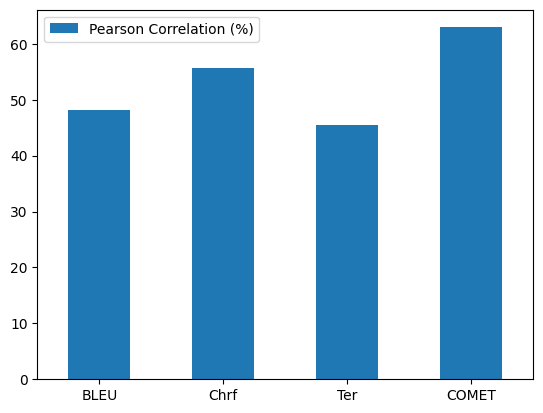

In [30]:
ax = df.plot.bar(y='Pearson Correlation (%)', rot=0)